In [1]:
%matplotlib inline
# %matplotlib notebook
import os;
import numpy as np
from numpy.linalg import pinv
from numpy.linalg import inv
import pandas as pd
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
plt.style.use('fivethirtyeight')

# For 3d plot
from mpl_toolkits.mplot3d import axes3d, Axes3D
from matplotlib import cm
import itertools

# very limited information when exception is caught
%xmode Plain
# %pdb on or %ipdb on # enable debugger when exception occurred

Exception reporting mode: Plain


In [2]:
# https://scipython.com/book/chapter-6-numpy/examples/creating-a-magic-square/
def magic(N):
    magic_square = np.zeros((N,N), dtype=int)

    n = 1
    i, j = 0, N//2

    while n <= N**2:
        magic_square[i, j] = n
        n += 1
        newi, newj = (i-1) % N, (j+1)% N
        if magic_square[newi, newj]:
            i += 1
        else:
            i, j = newi, newj

    return (magic_square)

In [3]:
path = os.getcwd()+'/data/ex2data1.txt';
data = pd.read_csv(path, header = None, names = ['Exam 1', 'Exam 2', 'Admitted'])
data.head(5)

,Exam 1,Exam 2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [19]:
data['Admitted'].head(5)

0    0
1    0
2    0
3    1
4    1
Name: Admitted, dtype: int64

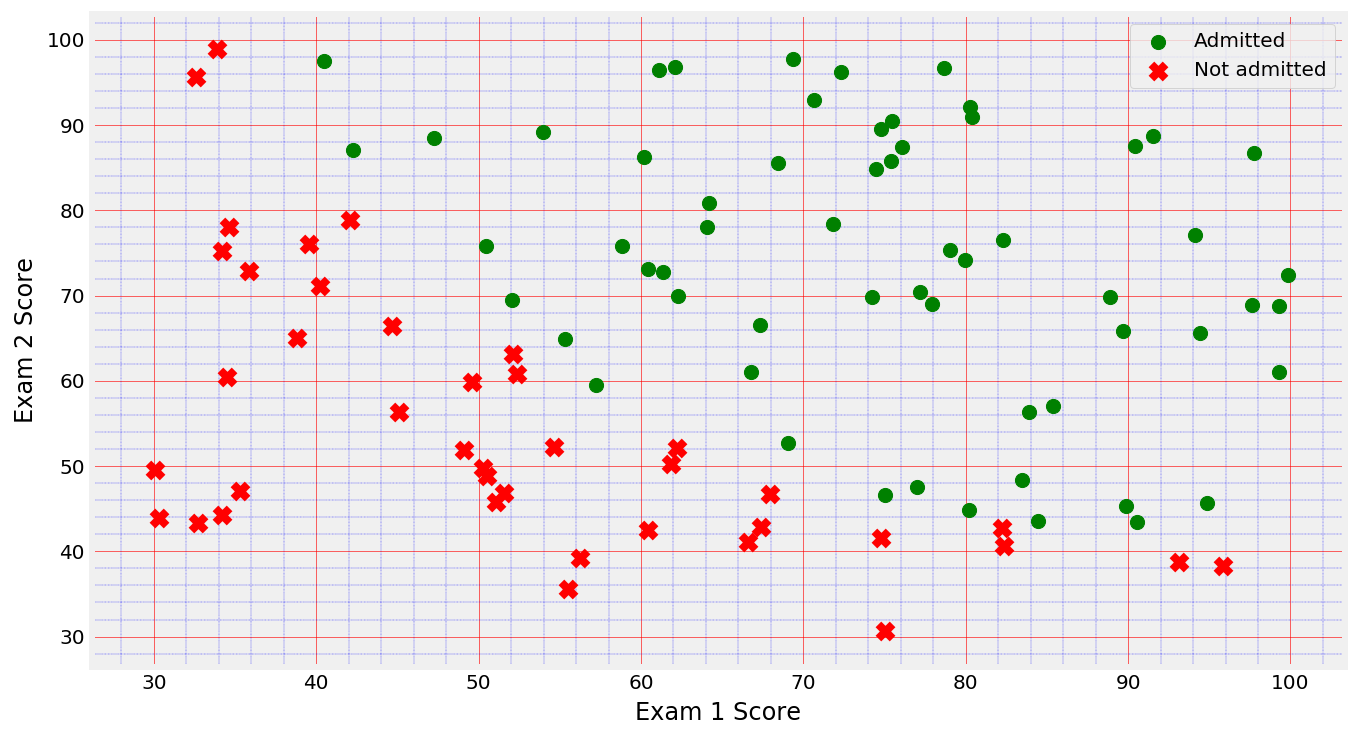

In [15]:
pos = data[data['Admitted'].isin([1])]
neg = data[data['Admitted'].isin([0])]
fig, ax = plt.subplots(figsize = (10, 6))
ax.scatter(x = pos['Exam 1'], y = pos['Exam 2'], s=50, c = 'g', marker = 'o', label = 'Admitted')
ax.scatter(x = neg['Exam 1'], y = neg['Exam 2'], s=50, c = 'r', marker = 'x', label = 'Not admitted' )
ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')
ax.legend(loc = 1)
ax.set_axisbelow(True)
ax.minorticks_on()
ls = (0, (3, 1, 1, 1, 1, 1))
ax.grid(which='major', linestyle='-', linewidth='0.3', color='red')
ax.grid(which='minor', linestyle=ls, linewidth='0.2', color='blue')
ax.tick_params(which='both') # turn off bottom ticks

In [4]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [5]:
sigmoid(0)

0.5

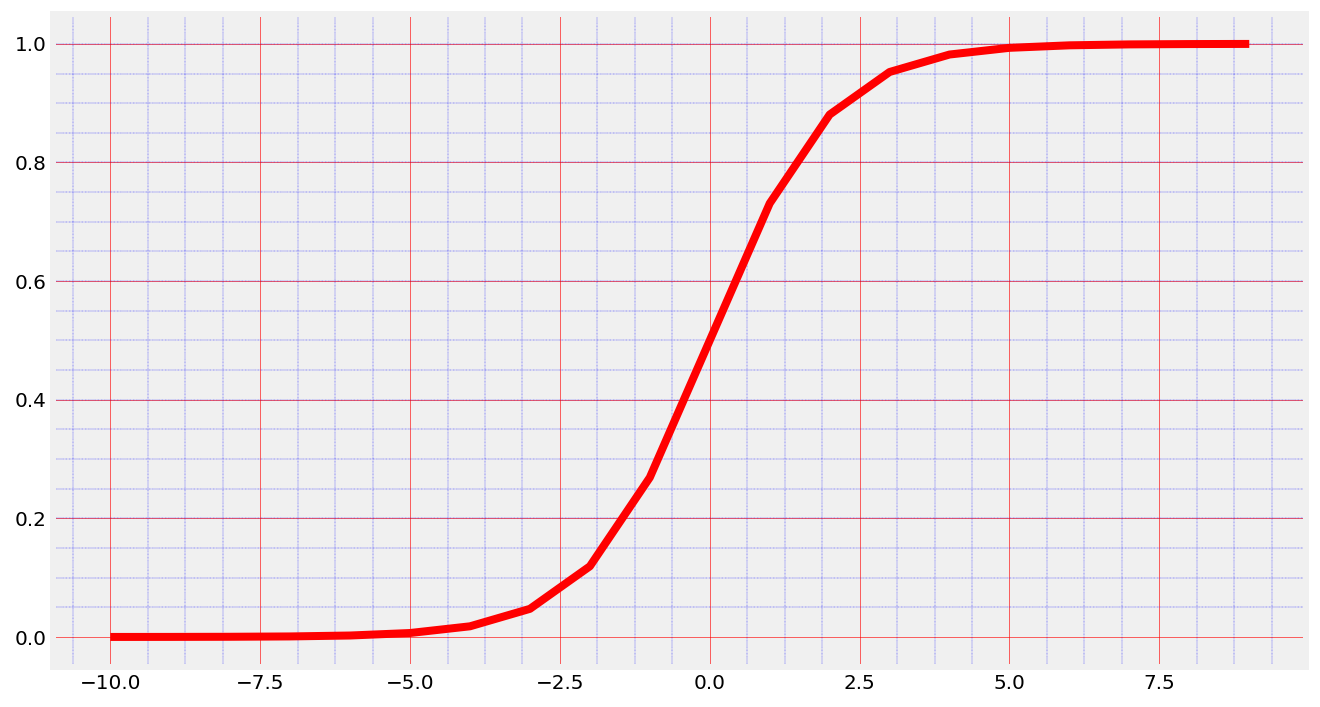

In [35]:
sig = np.arange(-10, 10, 1)

fig, ax = plt.subplots(figsize = (10, 6))
ax.plot(sig, sigmoid(sig), 'r')
ax.set_axisbelow(True)
ax.minorticks_on()
ls = (0, (3, 1, 1, 1, 1, 1))
ax.grid(which='major', linestyle='-', linewidth='0.3', color='red')
ax.grid(which='minor', linestyle=ls, linewidth='0.2', color='blue')
ax.tick_params(which='both')

In [6]:
data.insert(0, 'Ones', 1)
data.head(5)

,Ones,Exam 1,Exam 2,Admitted
0,1,34.623660,78.024693,0
1,1,30.286711,43.894998,0
2,1,35.847409,72.902198,0
3,1,60.182599,86.308552,1
4,1,79.032736,75.344376,1


In [7]:
cols = data.shape[1]

In [44]:
X = data.iloc[:, 0:cols-1]
y = data.iloc[:, cols-1 : cols]
X = np.array(X.values)
y = np.array(y.values)
X.shape, y.shape

((100, 3), (100, 1))

In [48]:
def costFunction(theta, X, y):
    X = np.matrix(X)
    y = np.matrix(y)
    theta = np.matrix(theta)
    first = np.multiply(-y, np.log(sigmoid(X * theta.T)))
    second = np.multiply((1 - y), np.log(1 - sigmoid(X * theta.T)))
    J = np.sum(first - second) / len(X)
    return J

In [49]:
_X = magic(3)
_X = np.insert(_X, 0, 1, axis=1)
_theta = np.array(np.zeros(4))
_y = np.array([1, 0, 1]).T
_X.shape, _y.shape, _theta.shape

((3, 4), (3,), (4,))

In [53]:
_J = costFunction(_theta, _X, _y)
_J

2.0794415416798357

In [54]:
theta = np.zeros(3)
J = costFunction(theta, X, y)
J

0.6931471805599453

In [57]:
def gradient(theta, X, y):
    X = np.matrix(X)
    y = np.matrix(y)
    theta = np.matrix(theta)
    
    iter = theta.shape[1]
    
    grad = np.zeros(iter)
    error = (sigmoid(X * theta.T) - y);
    
    for i in range(iter):
        grad[i] = np.sum(np.multiply(error, X[:, [i]])) / len(X)
        
    return grad   
    

In [58]:
grad = gradient(_theta, _X, _y)
grad

array([-0.5, -2.5, -2.5, -2.5])

In [59]:
grad = gradient(theta, X, y)
grad

array([ -0.1       , -12.00921659, -11.26284221])

In [64]:
import scipy.optimize as opt

result = opt.fmin_tnc(func = costFunction, x0 = theta, fprime = gradient, args = (X, y))
result

tuple

In [66]:
costFunction(result[0], X, y)

0.2034977015894744